# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Nurul Fatwa Al Fajar
- **Email:** arulkece50@gmail.com
- **ID Dicoding:** MC009D5Y0699

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

- Pertanyaan 2 : pada jam keberapa penyewaan sepeda paling banyak dilakukan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/Data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [81]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/Data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Perbandingan antar musim --> Kita bisa mengevaluasi bagaimana jumlah penyewa (baik casual maupun terdaftar) bervariasi di setiap musim.
- day.csv berisi 731 entry data harian
- hour.csv berisi 17379 entry data per jam
- Dampak cuaca –-> Kita bisa menganalisis apakah kondisi cuaca (seperti hujan atau kabut) berpengaruh terhadap jumlah pengguna.
- Hubungan suhu dan angin –-> Kita bisa melihat apakah ada keterkaitan antara suhu, kelembaban, dan kecepatan angin dengan jumlah penyewa.
- Perbedaan pengguna casual dan terdaftar –-> Kita bisa mengecek apakah pengguna casual lebih sering menyewa pada waktu tertentu atau dipengaruhi oleh faktor tertentu (seperti cuaca atau hari kerja).

### Assessing Data

#### **Menilai tabel day_df**

In [82]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [83]:
print("\nPreview Dataset day_df: ")
print(day_df.head())


Preview Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [84]:
print("\nCek Data Yang Hilang dalam Dataset day_df: ")
print(day_df.isna().sum())


Cek Data Yang Hilang dalam Dataset day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Menilai tabel hour_df**

In [85]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
print("\nPreview Dataset hour_df: ")
print(hour_df.head())


Preview Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [87]:
print("\nCek Data Hilang dalam Dataset hour_df: ")
print(hour_df.isna().sum())


Cek Data Hilang dalam Dataset hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ditemukan data yang hilang dalam kedua dataset yang ada (day.csv dan hour.csv).
Kolom dteday masih dalam format object (string), sebaiknya diubah menjadi format dengan nama datetime.
- Semua kolom lainnya memiliki tipe data yang sesuai dan pas dengan nilai yang disimpannya (integer dan float).

### Cleaning Data

#### Membersihkan day_df

##### Mengecek Duplicate data

In [88]:
print("\nJumlah Data Duplikat Yang Ada Dalam Dataset day_df: ", day_df.duplicated().sum())


Jumlah Data Duplikat Yang Ada Dalam Dataset day_df:  0


##### Missing Value

In [89]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan hour_df

##### Duplicate data

In [90]:
print("\nJumlah Data Duplikat Yang Ada Dalam Dataset hour_df: ", hour_df.duplicated().sum())


Jumlah Data Duplikat Yang Ada Dalam Dataset hour_df:  0


##### Missing value

In [91]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Kedua data set telah bersih dan tidak ada yang perlu di cleaning lagi.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [92]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
108,109,2011-04-19,2,0,4,0,2,1,2,0.505833,0.489258,0.665833,0.157971,409,2795,3204
263,264,2011-09-21,3,0,9,0,3,1,2,0.595000,0.550533,0.900000,0.096404,539,3813,4352
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
272,273,2011-09-30,4,0,9,0,5,1,1,0.564167,0.544829,0.647500,0.206475,830,4372,5202
659,660,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824
100,101,2011-04-11,2,0,4,0,1,1,2,0.595652,0.565217,0.716956,0.324474,855,2493,3348
228,229,2011-08-17,3,0,8,0,3,1,1,0.723333,0.666671,0.575417,0.143667,668,4026,4694
322,323,2011-11-19,4,0,11,0,6,0,1,0.329167,0.324483,0.502083,0.224496,943,2720,3663
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


### Explore hour-df

In [93]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16367,16368,2012-11-19,4,1,11,17,0,1,1,2,0.42,0.4242,0.58,0.1940,33,586,619
4031,4032,2011-06-21,3,0,6,21,0,2,1,1,0.72,0.6970,0.74,0.1940,38,191,229
9201,9202,2012-01-24,1,1,1,7,0,2,1,2,0.32,0.3333,0.93,0.1343,11,221,232
1287,1288,2011-02-26,1,0,2,19,0,6,0,1,0.32,0.3030,0.49,0.2537,30,64,94
10301,10302,2012-03-10,1,1,3,7,0,6,0,1,0.22,0.2121,0.44,0.2537,4,36,40
9942,9943,2012-02-24,1,1,2,7,0,5,1,2,0.40,0.4091,0.76,0.2239,7,265,272
6840,6841,2011-10-17,4,0,10,14,0,1,1,1,0.58,0.5455,0.49,0.1940,44,122,166
15242,15243,2012-10-02,4,1,10,7,0,2,1,3,0.58,0.5455,0.83,0.1045,4,256,260
11202,11203,2012-04-16,2,1,4,23,1,1,0,1,0.70,0.6364,0.45,0.2985,24,97,121
13090,13091,2012-07-04,3,1,7,15,1,3,0,1,0.92,0.8485,0.35,0.2985,155,299,454


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Fajar\AppData\Local\Temp\ipykernel_28588\1237285017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean, palette='coolwarm')


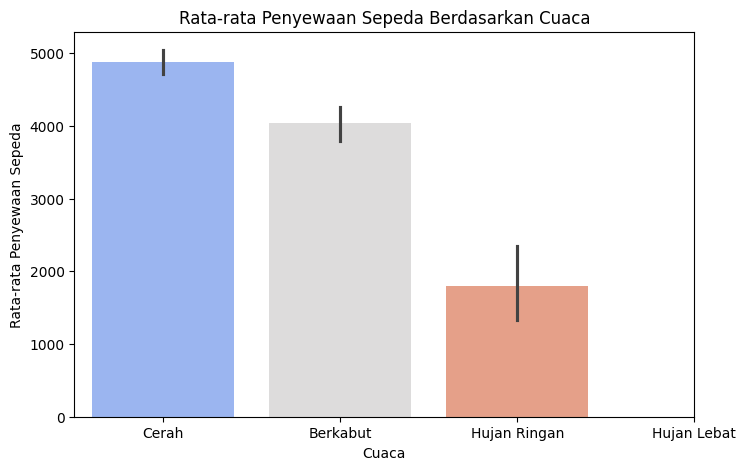

In [6]:
def tampilkan_penyewaan_berdasarkan_cuaca(df):
    plt.figure(figsize=(8,5))
    sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean, palette='coolwarm')
    plt.xlabel('Cuaca')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
    plt.show()

# Panggil fungsi untuk menampilkan penyewaan berdasarkan cuaca
tampilkan_penyewaan_berdasarkan_cuaca(day_df)


### Pertanyaan 2:

C:\Users\Fajar\AppData\Local\Temp\ipykernel_15072\3300028508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=df, estimator='mean', palette='viridis')


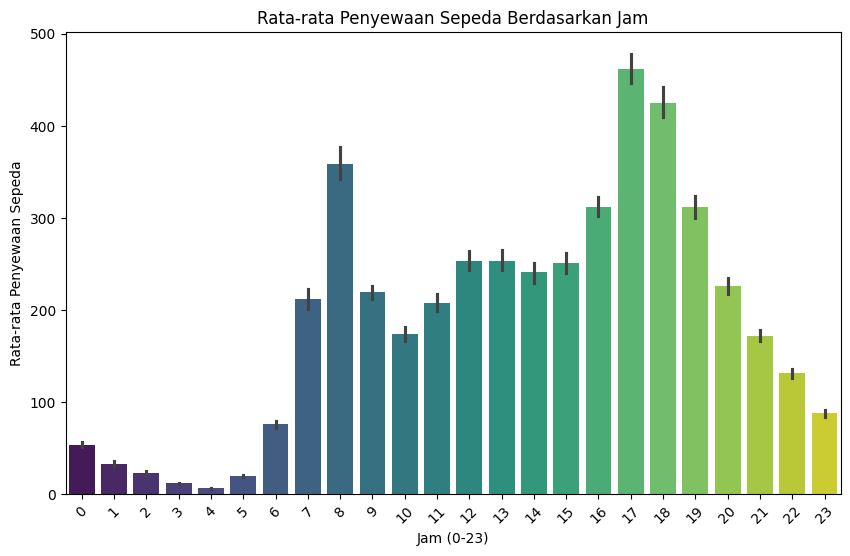

Penyewaan sepeda paling banyak dilakukan pada jam ke-18.


In [95]:
def tampilkan_penyewaan_berdasarkan_jam(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='hr', y='cnt', data=df, estimator='mean', palette='viridis')
    plt.xlabel('Jam (0-23)')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
    plt.xticks(rotation=45)
    plt.show()

# Panggil fungsi untuk menampilkan grafik
tampilkan_penyewaan_berdasarkan_jam(hour_df)

# Cari jam dengan penyewaan sepeda tertinggi
jam_terbanyak = hour_df.loc[hour_df['cnt'].idxmax(), 'hr']
print(f"Penyewaan sepeda paling banyak dilakukan pada jam ke-{jam_terbanyak}.")

## Conclusion

- Penyewaan sepeda cenderung lebih tinggi pada musim gugur dan lebih rendah di musim semi.
- Kondisi cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda, sedangkan hujan lebat menguranginya secara signifikan.